# Amazon Review Sentiment Analysis  
BAX 453 Final Project  

By Daria Zhan, Jiayin Ma, Kemal Yilmaz, Yanan Liu    
<br>
### Content:  
1. Problem Statement  
2. Data Preprocessing  
3. Exploratory Data Analysis  
4. Sentiment Analysis  
    - Word Cloud  
    - Classification Models  
    - Text Clustering  

## Project Overview 

- Leverage the review information to understand what cunstomers care about and how they evaluate a product.
- Provide recommendation for manufacturers to improve their products.  

<img width="733" alt="business question" src="https://user-images.githubusercontent.com/33208955/40760718-f001f190-644c-11e8-84fc-6bf1aedcbbdd.png">


#### Import packages

In [83]:
import json
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import Word
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
import itertools
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import gridspec
import seaborn as sns
import wordcloud as wc
%matplotlib inline

In [54]:
# convert json file into dataframe
df = pd.read_json("reviews_Health_and_Personal_Care_5.json", lines=True)

In [55]:
# reorder the columns
df = df[['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'reviewTime', 'unixReviewTime']]

In [106]:
df_new.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,reviewTime,unixReviewTime,helpful_score,pos_neg,text_comb,word_count,sentiment
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5,Handy little gadget,2011-01-05,1294185600,1.000000,1,handy little gadget great little gadget around...,46,0.320833
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4,Small & may need to encourage battery,2012-02-18,1329523200,1.000000,1,small may need encourage battery would recomme...,101,0.175000
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4,Very good but not great,2010-06-08,1275955200,0.974026,1,good great liked quality lens built light lens...,231,0.380072
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4,great addition to your purse,2008-02-08,1202428800,0.933333,1,great addition purse love great point light po...,83,0.317308
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5,Very nice and convenient.,2011-08-16,1313452800,1.000000,1,nice convenient nice pull magnifier want light...,45,0.405556


In [56]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,reviewTime,unixReviewTime
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5,Handy little gadget,"01 5, 2011",1294185600
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4,Small & may need to encourage battery,"02 18, 2012",1329523200
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4,Very good but not great,"06 8, 2010",1275955200
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4,great addition to your purse,"02 8, 2008",1202428800
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5,Very nice and convenient.,"08 16, 2011",1313452800


In [57]:
df.info()
# 1.5% missing data in reviewerName

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346355 entries, 0 to 346354
Data columns (total 9 columns):
reviewerID        346355 non-null object
asin              346355 non-null object
reviewerName      343304 non-null object
helpful           346355 non-null object
reviewText        346355 non-null object
overall           346355 non-null int64
summary           346355 non-null object
reviewTime        346355 non-null object
unixReviewTime    346355 non-null int64
dtypes: int64(2), object(7)
memory usage: 26.4+ MB


## Data Preprocessing  

In [58]:
df_new = df

In [59]:
df_new.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,reviewTime,unixReviewTime
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5,Handy little gadget,"01 5, 2011",1294185600
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4,Small & may need to encourage battery,"02 18, 2012",1329523200
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4,Very good but not great,"06 8, 2010",1275955200
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4,great addition to your purse,"02 8, 2008",1202428800
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5,Very nice and convenient.,"08 16, 2011",1313452800


In [60]:
# covert column 'helpful' to float
# helpful_score = helpful[0]/helpful[1]
df_new['helpful_score'] = df_new['helpful'].apply(lambda x: x[0])/df_new['helpful'].apply(lambda x: x[1])

# convert reviewtime to datatime format
df_new["reviewTime"] = pd.to_datetime(df_new["reviewTime"])

# convert the ratings to positive(>3) and negetive(<=3)
df_new['pos_neg'] = [1 if x > 3 else 0 for x in df_new['overall']]

# Do the negative sentiments contain a lesser amount of words than the positive ones? 
df_new['word_count'] = df_new['reviewText'].apply(lambda x: len(x.split(" ")))

# combine reviewText and summary
df_new['text_comb'] = df_new['summary']+ ' ' + df_new['reviewText']

# covert all the text to lowercase
df_new['text_comb'] = df_new['text_comb'].apply(lambda x: x.lower())

# remove punctuations
df_new['text_comb'] = df_new['text_comb'].str.replace('[^\w\s]','')

# remove stop words
stop = stopwords.words("english")
df_new['text_comb'] = df_new['text_comb'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Lemmatization
df_new['text_comb'] = df_new['text_comb'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [61]:
df_new.describe()

,overall,unixReviewTime,helpful_score,pos_neg,word_count
count,346355.000000,3.463550e+05,160798.000000,346355.000000,346355.000000
mean,4.274958,1.361590e+09,0.706427,0.807845,96.350932
std,1.120213,4.352351e+07,0.364166,0.393995,119.177223
min,1.000000,9.763200e+08,0.000000,0.000000,1.000000
25%,4.000000,1.351598e+09,0.500000,1.000000,34.000000
50%,5.000000,1.373414e+09,0.900000,1.000000,61.000000
75%,5.000000,1.391126e+09,1.000000,1.000000,116.000000
max,5.000000,1.406074e+09,1.000000,1.000000,5425.000000


## Exploratory Data Analysis

In [65]:
df_new['word_count'].groupby(df_new['pos_neg']).count()

pos_neg
0     66554
1    279801
Name: word_count, dtype: int64

In [ ]:
df_new['word_count'].groupby(df_new['pos_neg']).describe()

### What's the percentage of 5-star ratings?

* 80.27%(5-star rating + 4-star rating) customers are satisfied with the products.


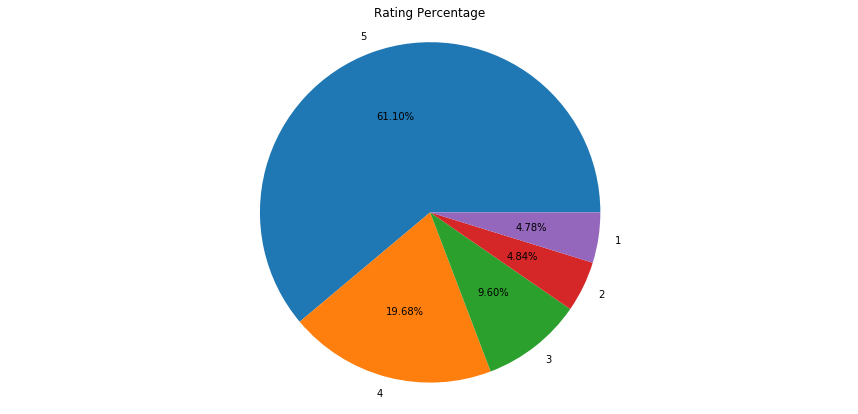

In [72]:
f,ax=plt.subplots(1, figsize=(15,7))
df_new['overall'].value_counts().plot.pie(autopct='%1.2f%%',shadow=False)
ax.axis('equal')  # to make the pie a circle
ax.set_title('Rating Percentage')
ax.set_ylabel('')
print ('* 80.27%(5-star rating + 4-star rating) customers are satisfied with the products.')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2034c7c88>,
      dtype=object)

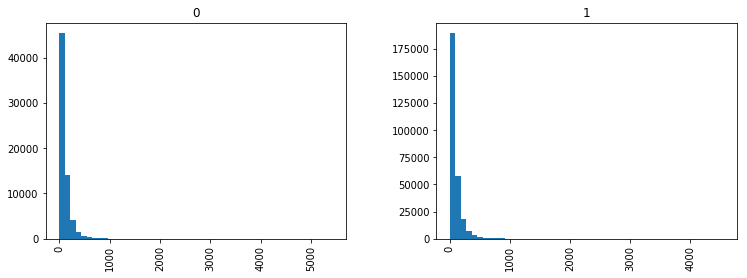

In [130]:
df_new.hist(column='word_count', by='pos_neg', bins=50,figsize=(12,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1fafff4e0>,
      dtype=object)

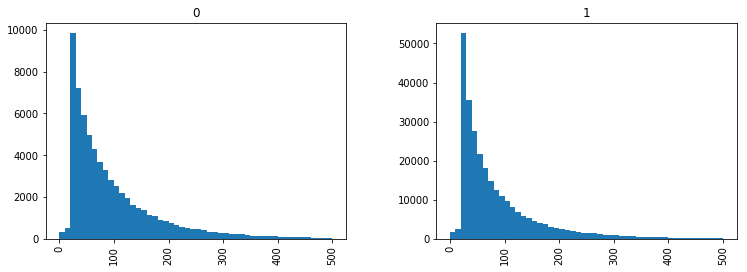

In [132]:
df_new.hist(column='word_count', by='pos_neg', range=(0, 500), bins=50,figsize=(12,4))

In [138]:
df_new['word_count'].max()

5425

**要改成max**

In [140]:
df_new[df_new['word_count'] == 5425]['overall'].iloc[0]

2

In [141]:
df_new[df_new['word_count'] == 5425]['asin'].iloc[0]

'B000LZIXJO'

插图！

In [139]:
df_new[df_new['word_count'] == 5425]['reviewText'].iloc[0]

'WSN Nerve Formula ReviewThe manufacture claims: "The WSN Nerve Support Formula is a medical food specifically formulated for the dietary management of neuropathy" and goes on to claim it can help end the pain and suffering of neuropathy.I have had neuropathy (caused by accidents that damaged my nerves, not from diabetes) for over 12 years, getting worse each year and I have tried this product. I noticed no improvement from taking this product exactly as directed for 3 months. I will not say it will not work for you, but I will say you should be EXTREMELY CAREFUL before you use this product. And not just because you might end up wasting your money. I explain why below.Below I have also taken the time to tell you of things I\'ve done, without the use of any prescription drugs or expensive supplements, that have helped me with the pain, burning, and numbness caused by my particular type of neuropathy. I include this information at the bottom of this review.But first, MY REVIEW of the pro

**Look at dist. instead of count.**

### How many unique products were reviewed?

In [73]:
uni_products = df_new['overall'].groupby(df_new['asin']).count()
print("Number of Unique Products in the Electronic Category = {}".format(uni_products.count()))

Number of Unique Products in the Electronic Category = 18534


### Which product has the most number of reviews?

In [74]:
products_sort = uni_products.sort_values(ascending=False)
print("Top 10 Reviewed Products:\n")
print(products_sort[:10], end='\n\n')
print('Most Reviewed Product, B001HBHNHE - has {} reviews.'.format(products_sort.max()))

Top 10 Reviewed Products:

asin
B0037KMI0U    1089
B0010JLMO8     767
B001KXZ808     699
B0049LUI9O     528
B000GIPJY8     475
B001F51VRK     469
B000NL0T1G     434
B001F51VS4     431
B004YHKUXC     427
B007UZNS5W     422
Name: overall, dtype: int64

Most Reviewed Product, B001HBHNHE - has 1089 reviews.


**The product that has most reviews is a water bottle.**  
__[Amazon Product Page](https://www.amazon.com/BlenderBottle-Classic-Discontinued-Style-20-Ounce/dp/B0010JLMO8/ref=sr_1_1?ie=UTF8&qid=1527670988&sr=8-1&keywords=B0010JLMO8)__
<img width="833" alt="second most reviewed_personal care" src="https://user-images.githubusercontent.com/33208955/40735397-f408564c-63ef-11e8-8918-acdfa7997a73.png">

### Which product has the least number of reviews?

In [75]:
print("Bottom 10 Reviewed Products:\n")
print(products_sort[-10:], end='\n\n')
print('Least Reviewed Product has {} reviews.'.format(products_sort.min()))

Bottom 10 Reviewed Products:

asin
B001F3NGRK    5
B005NZ4IBY    5
B000H8DW5K    5
B003B4YO4A    5
B000H84COA    5
B005NWHOPE    5
B009YZD3U6    5
B009Z6KLEK    5
B001F51R9M    5
B000U5ZPJ6    5
Name: overall, dtype: int64

Least Reviewed Product has 5 reviews.


**The product that has least reviews is a sleeping pills product.**  
__[Amazon Product Page](https://www.amazon.com/Natrol-Melatonin-Release-Tablets-Count/dp/B000U5ZPJ6/ref=sr_1_1_a_it?s=home-garden&ie=UTF8&qid=1527671086&sr=8-1&keywords=B000U5ZPJ6)__
<img width="635" alt="least reviewed_personal care" src="https://user-images.githubusercontent.com/33208955/40735476-1c4a011e-63f0-11e8-99e8-c3490d40af8f.png">

## Sentiment Analysis

In [85]:
pos_rev = ' '.join(df_new['text_comb'].where(df_new['pos_neg']==1).dropna().tolist())
neg_rev = ' '.join(df_new['text_comb'].where(df_new['pos_neg']==0).dropna().tolist())
all_rev = ' '.join(df_new['text_comb'].dropna().tolist())

Text(0.5,1,'Negative Reviews')

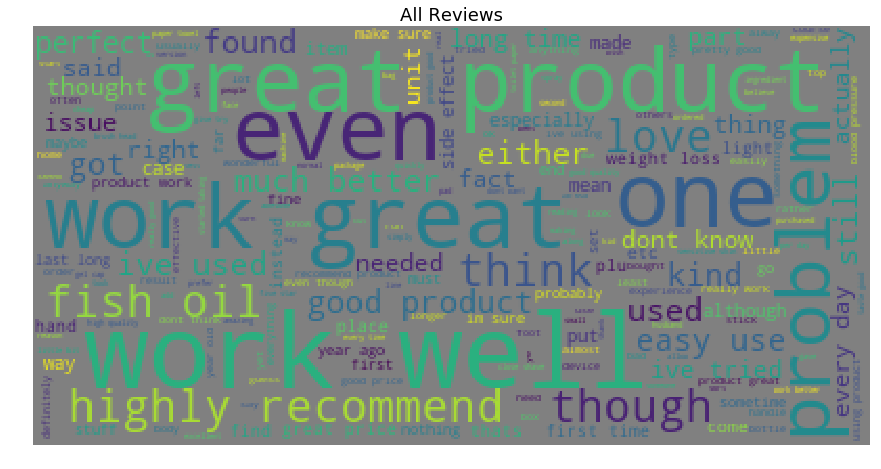

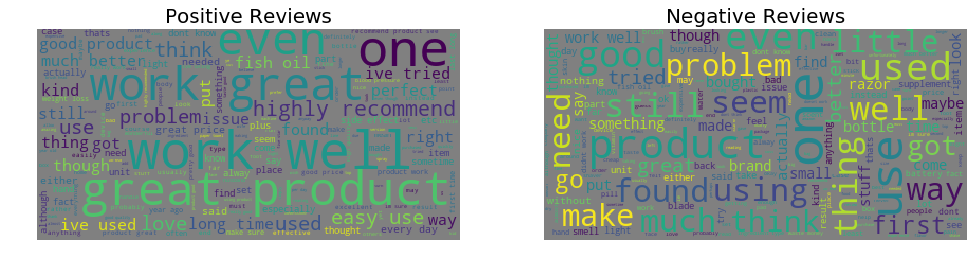

In [87]:
wordcloud_all = wc.WordCloud(background_color='gray', max_font_size=50, relative_scaling=.5).generate(all_rev)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud_all)
plt.axis("off")
plt.title('All Reviews', fontsize=18)

wordcloud_pos = wc.WordCloud(background_color='gray', max_font_size=50, relative_scaling=.5).generate(pos_rev)
plt.figure(figsize=(15, 15), dpi=80)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.title('Positive Reviews', fontsize=18)

wordcloud_neg = wc.WordCloud(background_color='gray', max_font_size=50, relative_scaling=.5).generate(neg_rev)
plt.subplot(gs[0, 1])
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.title('Negative Reviews', fontsize=18)

### Is the sentiment of the review related to the rating?

In [88]:
df_new['sentiment'] = df_new['text_comb'].apply(lambda x: TextBlob(x).sentiment[0] )

In [89]:
senti_train, senti_test, rating_train, rating_test = train_test_split(df_new['sentiment'], df_new['overall'], test_size=0.33, random_state=42)
print (senti_train.shape)
print (senti_test.shape)
print (rating_train.shape)
print (rating_test.shape)

(232057,)
(114298,)
(232057,)
(114298,)


In [90]:
senti_train = senti_train.reshape(-1, 1)
senti_test = senti_test.reshape(-1, 1)
rating_train = rating_train.reshape(-1, 1)
rating_test = rating_test.reshape(-1, 1)

/Users/carlicema/Documents/My_Studio/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/Users/carlicema/Documents/My_Studio/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/carlicema/Documents/My_Studio/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carlicema/Documents/My_Studio/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. P

In [91]:
regr = linear_model.LinearRegression()
regr.fit(senti_train, rating_train)
rating_pred = regr.predict(senti_test)
print('r_2 statistic: %.2f' % r2_score(rating_test, rating_pred))

r_2 statistic: 0.11


/Users/carlicema/Documents/My_Studio/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


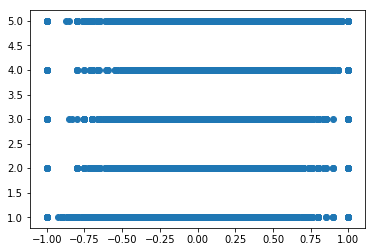

In [92]:
plt.scatter(senti_train, rating_train)
plt.show()

In [111]:
df_new['senti_pos_neg'] = [1 if x > 0 else 0 for x in df_new['sentiment']]

In [114]:
df_new['senti_pos_neg'].corrwith(df_new['pos_neg'])

AttributeError: 'Series' object has no attribute 'corrwith'

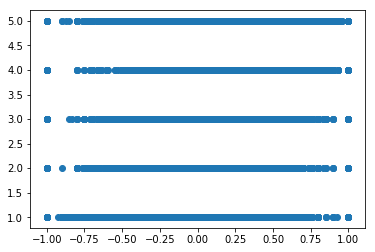

In [118]:
plt.scatter(df_new['senti_'], df_new['overall'])

In [119]:
match = df_new['senti_pos_neg'].apply(lambda x: 1 if x == (df_new['pos_neg'].apply(lambda y: y)))

SyntaxError: invalid syntax (<ipython-input-119-867a428d3cea>, line 1)

In [125]:
abs(df_new['senti_pos_neg']-df_new['pos_neg']).sum()/abs(df_new['senti_pos_neg']-df_new['pos_neg']).count()

0.20208167920197484

**饼状图！！！**

## Classification Models  

#### Split train and test datasets

In [93]:
X_train, X_test, y_train, y_test = train_test_split(df_new['text_comb'], df_new['pos_neg'], test_size=0.33, random_state=42)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(232057,)
(114298,)
(232057,)
(114298,)


#### Vetorize the features using TF-IDF

In [94]:
vectorizer = TfidfVectorizer()
X_train_matrix = vectorizer.fit_transform(X_train)
X_test_matrix = vectorizer.transform(X_test)

### Model 1: MultinomialNB

In [95]:
mnb = MultinomialNB(alpha=.01)

mnb.fit(X_train_matrix, y_train)
mnb_pred = mnb.predict(X_test_matrix)

mnb_acc = accuracy_score(y_test, mnb_pred)
mnb_prec = precision_score(y_test, mnb_pred)
mnb_rec = recall_score(y_test, mnb_pred)
mnb_f1 = f1_score(y_test, mnb_pred)

print('MNB Accuracy: {0:.2f}%'.format(mnb_acc*100))
print('MNB Precision Score: {0:.2f}%'.format(mnb_prec*100))
print('MNB Recall Score: {0:.2f}%'.format(mnb_rec*100))
print('MNB Data F1 Score: {0:.4f}'.format(mnb_f1))

MNB Accuracy: 82.60%
MNB Precision Score: 82.85%
MNB Recall Score: 98.91%
MNB Data F1 Score: 0.9017


In [96]:
mnb_cfm = confusion_matrix(y_test, mnb_pred)
print("Confusion matrix:")
print(mnb_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[ 3215 18875]
 [ 1009 91199]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


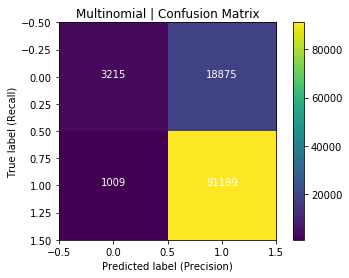

In [97]:
plt.imshow(mnb_cfm)

for i, j in itertools.product(range(mnb_cfm.shape[0]), range(mnb_cfm.shape[1])):
    plt.text(j, i, mnb_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Multinomial | Confusion Matrix')
plt.colorbar()

### Model 2: SVM

svm = SVC()

svm.fit(X_train_matrix, y_train)
svm_pred = svm.predict(X_test_matrix)

svm_acc = accuracy_score(y_test,svm_pred)
svm_prec = precision_score(y_test, svm_pred)
svm_rec = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

print('Raw Data Accuracy: {0:.2f}%'.format(svm_acc*100))
print('Raw Data Precision Score: {0:.2f}%'.format(svm_prec*100))
print('Raw Data Recall Score: {0:.2f}%'.format(svm_rec*100))
print('Raw Data F1 Score: {0:.4f}'.format(svm_f1))

### Model 3: Logistic Regression

In [98]:
logreg = LogisticRegression(C=0.1)

logreg.fit(X_train_matrix, y_train)
log_pred = logreg.predict(X_test_matrix)

log_acc = accuracy_score(y_test,log_pred)
log_prec = precision_score(y_test, log_pred)
log_rec = recall_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred)

print('logreg Accuracy: {0:.2f}%'.format(log_acc*100))
print('logreg Precision Score: {0:.2f}%'.format(log_prec*100))
print('logreg Recall Score: {0:.2f}%'.format(log_rec*100))
print('logreg F1 Score: {0:.4f}'.format(log_f1))

logreg Accuracy: 86.40%
logreg Precision Score: 86.74%
logreg Recall Score: 98.15%
logreg F1 Score: 0.9209


In [99]:
log_cfm = confusion_matrix(y_test, log_pred)
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[ 8250 13840]
 [ 1704 90504]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


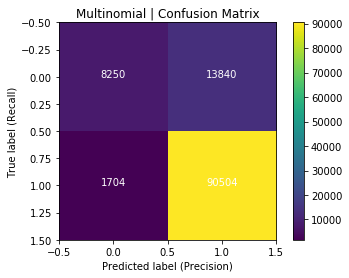

In [100]:
plt.imshow(log_cfm)

for i, j in itertools.product(range(log_cfm.shape[0]), range(log_cfm.shape[1])):
    plt.text(j, i, log_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Multinomial | Confusion Matrix')
plt.colorbar()

## Text Clustering

In [101]:
text = vectorizer.transform(df_new['text_comb'])

feature_names = vectorizer.get_feature_names()
print("Number of total features: {}".format(len(feature_names)))

Number of total features: 276262


### Latent Factor Model

In [102]:
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [107]:
num_top_words = 15

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
    for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [104]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print (documents[doc_index])

In [ ]:
lda_h = 

In [105]:
lda.fit(text)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [108]:
print("\nTopics in LDA model:")
print_top_words(lda, feature_names, num_top_words)


Topics in LDA model:
Topic #0: it8217s fitbit glow eden cedar security grand paks popup eyesight harmony thinkthin macular degeneration loratadine
Topic #1: brilliant airfloss hydroxycut allot ubersurge pricei preworkouts eve offputting shaping kava onethe bpi novice intimidating
Topic #2: yacon focused platinum plantar horn parker fasciitis ihave boar astra forposting granddaughter legit perfumed nephew
Topic #3: krill bulksupplements omega3 mg nutrigold forskolin ubiquinol magnesium lutein b12 mcg gaia calcium k2 choline
Topic #4: product great good work like one use well really get love would time day dont
Topic #5: handled oxy bye 2ply attache frankincense optic rabbit susceptible in newspaper backache tiredness telescoping dandy
Topic #6: biased moringa arnicare couldn8217t vintage flint regulation salonpas realy ed cinch wheres tar usedi headband
Topic #7: tp endurance hydrate recieved rhodiola serotonin spoiled expired boo agave ge lifter hawaiian elevation multipack
Topic #8: 

## Summary  & Recommendations


In [ ]:
# df_new['reviewTime'] = df_new['reviewTime'].str.replace(',', '')
# df_new['reviewTime'] = df_new['reviewTime'].str.split(' ',2)

class PreprocessData(df):
    
    def __init__(self, datafile):
        self.datafile = datafile
        self.data = pd.read_csv(datafile).fillna('')
        self.data.Rating = self.data.Rating.apply(lambda x: int(x))
    
    def get_datetime(df):
        df["reviewTime"] = pd.to_datetime(df["reviewTime"])
    
    # covert column 'helpful' to float
    # helpful_score = helpful[0]/helpful[1]
    def helpful_score(df):
        df['helpful_score'] = df['helpful'].apply(lambda x: x[0])/df['helpful'].apply(lambda x: x[1])
    
    # convert the ratings to positive(>3) and negetive(<=3)
    def rating_dum(df):
        df['pos_neg'] = [1 if x > 3 else 0 for x in df['overall']]
    
    # Combine summary and review text
    def unify_columns(df):
        df['text_comb'] = df['summary'] + ' ' + df['reviewText']
    
    def remove_stopwords(df):
        stop = stopwords.words("english")
        df['text_comb'] = df_new['text_comb'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    
    def lemmatization(df):
        df_new['text_comb'] = df_new['text_comb'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    
    def get_wordcould(df):
        cloud = wc.WordCloud(background_color='gray', max_font_size=60, relative_scaling=1).generate(' '.join(df['text_comb']))
        fig = plt.figure(figsize=(20, 10))
        plt.axis('off')
        plt.show(cloud)

class PreprocessData:
    
    def __init__(self, datafile):
        self.datafile = datafile
        self.data = pd.read_json(datafile, lines=True)
        #self.data.Rating = self.data.Rating.apply(lambda x: int(x))
    
    def get_datetime(self):
        self.data.reviewTime = pd.to_datetime(self.data.reviewTime)
    
    # covert column 'helpful' to float
    # helpful_score = helpful[0]/helpful[1]
    def helpful_score(self):
        self.data.helpful_score = self.data.helpful.apply(lambda x: x[0])/self.data.helpful.apply(lambda x: x[1])
    
    # convert the ratings to positive(>3) and negetive(<=3)
    def rating_dum(self):
        self.data.pos_neg = [1 if x > 3 else 0 for x in self.data.overall]
    
    # Combine summary and review text
    def unify_columns(self):
        self.data.text_comb = self.date.summary + ' ' + self.data.reviewText
    
    def remove_stopwords(self):
        stop = stopwords.words("english")
        self.data.text_comb = self.data.text_comb.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    
    def lemmatization(self):
        self.data.text_comb = self.data.text_comb.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    
    def get_wordcloud(self):
        cloud = wc.WordCloud(background_color='gray', max_font_size=60, relative_scaling=1).generate(' '.join(self.data.text_comb))
        fig = plt.figure(figsize=(20, 10))
        plt.axis('off')
        plt.show(cloud)